## Linear Algebra

In [9]:
import numpy as np
from scipy import linalg

### Linear Eq. Solution

In [10]:

a = np.array([[7, 2], [4, 5]])
b = np.array([8, 10])

# (mat a)(X Y) = (mat b)
solutions = linalg.solve(a,b)
print('Possible Solutions x, y for given set of equations: \n', solutions)

Possible Solutions x, y for given set of equations: 
 [0.74074074 1.40740741]


### Determinant

In [11]:
mat = np.array([[4,0],[0,3]])

mat_det = linalg.det(mat)
print(mat_det)

12.0


### Inverse

In [12]:

mat = np.array([[4,0],[0,3]])

mat_inv = linalg.inv(mat)
print("Inverse of matrix:\n", mat_inv)

Inverse of matrix:
 [[ 0.25       -0.        ]
 [ 0.          0.33333333]]


### Eigenvalues and Eigenvectors


In [13]:
mat = np.array([[8,2],
                [12,6]])

eigenvalues, eigenvectors = linalg.eig(mat)

print('eigenvalues',eigenvalues)
print('\neigenvectors',eigenvectors)

eigenvalues [12.+0.j  2.+0.j]

eigenvectors [[ 0.4472136  -0.31622777]
 [ 0.89442719  0.9486833 ]]


In [14]:
mat = np.array([[1, 5],
              [6, 10]]) 

eigenvalues, eigenvectors = linalg.eig(mat)

print('eigenvalues',eigenvalues)
print('\neigenvectors',eigenvectors)

eigenvalues [-1.58872344+0.j 12.58872344+0.j]

eigenvectors [[-0.88803519 -0.39615409]
 [ 0.4597755  -0.91818404]]


### SVD        ll            Singular Value Decomposition

In [15]:
M = np.array([[1, 5],
              [6, 10]])  

U,s,Vh = linalg.svd(M)

print("U matrix:")
print(U)
print("\nSingular values:")
print(s)
print("\nVh matrix:")
print(Vh)

U matrix:
[[-0.38684104 -0.92214641]
 [-0.92214641  0.38684104]]

Singular values:
[12.62901571  1.58365469]

Vh matrix:
[[-0.46873958 -0.88333641]
 [ 0.88333641 -0.46873958]]


## Application of SVD

Original image shape: (100, 100)
Number of singular values: 100
Top 10 singular values: [50.02361212 15.49353327  1.95406903  1.92537446  1.83568008  1.79901163
  1.75251986  1.7193605   1.67213811  1.66136452]


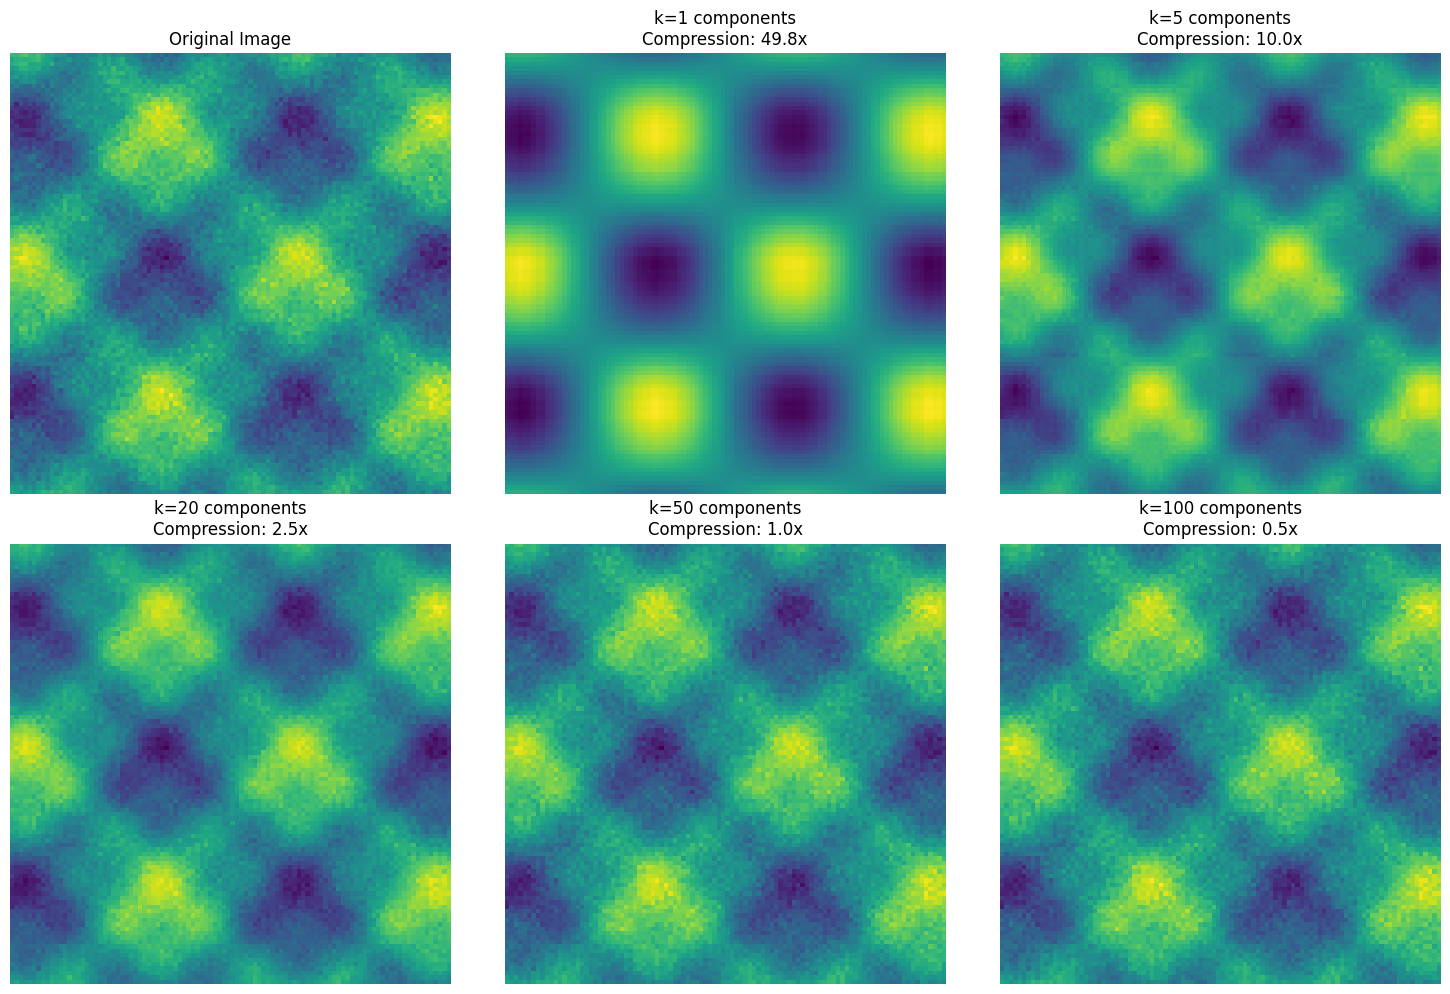

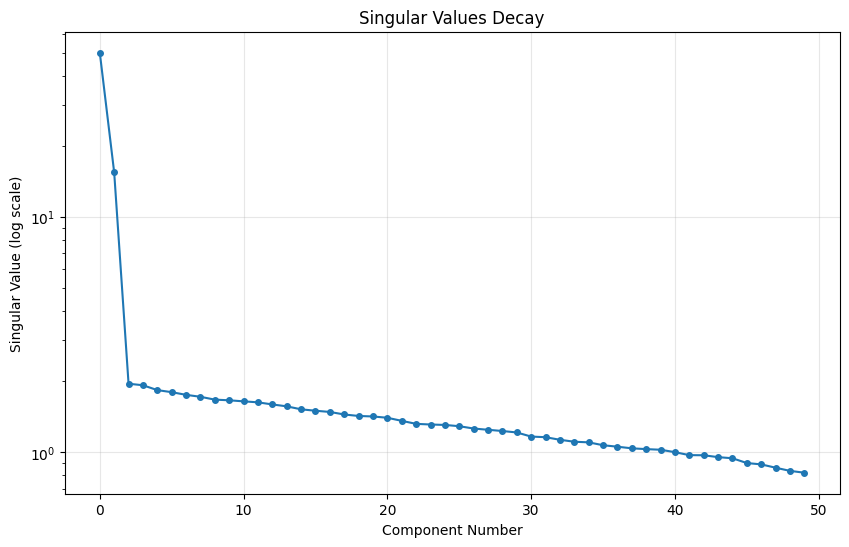


 Key Insight: Most information is captured by the first few components!


In [16]:
import matplotlib.pyplot as plt
import numpy as np

def image_compression_demo():
    """Demonstrate image compression using SVD"""
    # Create a synthetic image with interesting patterns
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    
    # Create pattern: combination of sine waves
    image = np.sin(X) * np.cos(Y) + 0.3 * np.sin(3*X) * np.sin(3*Y)
    
    # Add some noise for realism
    np.random.seed(42)
    image += 0.1 * np.random.randn(*image.shape)
    
    print(f"Original image shape: {image.shape}")
    
    # Compute SVD
    U, sigma, VT = np.linalg.svd(image)
    
    print(f"Number of singular values: {len(sigma)}")
    print(f"Top 10 singular values: {sigma[:10]}")
    
    # Show compression with different numbers of components
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    # Original image
    im0 = axes[0].imshow(image, cmap='viridis')
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    # Reconstructions with different numbers of components
    components = [1, 5, 20, 50, 100]
    
    for i, k in enumerate(components):
        # Reconstruct using only first k components
        image_k = U[:, :k] @ np.diag(sigma[:k]) @ VT[:k, :]
        
        # Calculate compression ratio
        original_elements = image.shape[0] * image.shape[1]
        compressed_elements = k * (U.shape[0] + VT.shape[1] + 1)
        compression_ratio = original_elements / compressed_elements
        
        im = axes[i+1].imshow(image_k, cmap='viridis')
        axes[i+1].set_title(f'k={k} components\nCompression: {compression_ratio:.1f}x')
        axes[i+1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Plot singular values decay
    plt.figure(figsize=(10, 6))
    plt.semilogy(sigma[:50], 'o-', markersize=4)
    plt.title('Singular Values Decay')
    plt.xlabel('Component Number')
    plt.ylabel('Singular Value (log scale)')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print(f"\n Key Insight: Most information is captured by the first few components!")
    
    return image, U, sigma, VT

image_demo, U_img, sigma_img, VT_img = image_compression_demo()
